In [1]:
import os
import numpy as np 
import pandas as pd 
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupShuffleSplit, GroupKFold, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np
from imblearn.over_sampling import RandomOverSampler


import xgbfir
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import dtreeviz
from typing import Any, Dict, Union

from yellowbrick import model_selection as ms
from yellowbrick.model_selection import validation_curve

from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
patient_list  =  ['P1 N1', 'P2 N1', 'P2 N2', 'P3 N1', 'P3 N2', 'P4 N1', 'P4 N2', 'P5 N1',
                   'P6 N2', 'P7 N1', 'P7 N2','P8 N1','P10 N1', 'P11 N1', 'P15 N1',
                  'P16 N1', 'P17 N1', 'P18 N1','P20 N1', 'P21 N1', 'P21 N2', 'P21 N3',
                  'P22 N1','P23 N1', 'P23 N3', 'P24 N1','P27 N1','P28 N1',
                  'P28 N2', 'P29 N2', 'P30 N1']  #'P6 N1','P23 N2',

In [3]:
human_wt = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4']
human_gap = ['P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30'] 

In [134]:
conn_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Connectivity_MNE/xgb_dataframes/'
cc_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Cross_Corr_Channels/'
hfd_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/hfd_df/'
hurst_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/hurst_df/'
disp_mne = '/home/melissa/RESULTS/FINAL_MODEL/Human/Complexity/DispEn_DF/'

delta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/delta/'
theta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/theta/'
sigma_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/sigma/'
beta_plv_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/plv/beta/'

delta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/delta/'
theta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/theta/'
sigma_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/sigma/'
beta_pli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/pli/beta/'

delta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/delta/'
theta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/theta/'
sigma_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/sigma/'
beta_wpli_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/wpli/beta/'

delta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/delta/'
theta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/theta/'
sigma_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/sigma/'
beta_coh_graph_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Graph_Theory/coh/beta/' 

power_dir = '/home/melissa/RESULTS/FINAL_MODEL/Human/Power/'


all_dataframes = []

for patient in patient_list:
    conn_df = pd.read_csv(conn_mne + str(patient) + '_all_conn_measures.csv')
    cc_df = pd.read_csv(cc_mne + str(patient) + '.csv')
    hfd_df = pd.read_csv(hfd_mne + str(patient) + '_hfd.csv')
    hurst_df = pd.read_csv(hurst_mne + str(patient) + '_hurst.csv')
    disp_df = pd.read_csv(disp_mne + str(patient) + '_dispen.csv')
    
    delta_plv = pd.read_csv(delta_plv_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_plv = pd.read_csv(theta_plv_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_plv = pd.read_csv(sigma_plv_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_plv  = pd.read_csv(beta_plv_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_pli = pd.read_csv(delta_pli_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_pli = pd.read_csv(theta_pli_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_pli = pd.read_csv(sigma_pli_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_pli  = pd.read_csv(beta_pli_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_wpli = pd.read_csv(delta_wpli_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_wpli = pd.read_csv(theta_wpli_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_wpli = pd.read_csv(sigma_wpli_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_wpli  = pd.read_csv(beta_wpli_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    delta_coh = pd.read_csv(delta_coh_graph_dir + str(patient) + '_delta_graph_theory.csv' )
    theta_coh = pd.read_csv(theta_coh_graph_dir + str(patient) + '_theta_graph_theory.csv' )
    sigma_coh = pd.read_csv(sigma_coh_graph_dir + str(patient) + '_sigma_graph_theory.csv' )
    beta_coh  = pd.read_csv(beta_coh_graph_dir + str(patient) + '_beta_graph_theory.csv' )
    
    power = pd.read_csv(power_dir + str(patient) + '_power_all_frequency_bands.csv')
    power_clean = power.drop(['Unnamed: 0', 'Patient_ID'], axis = 1)
    print(power_clean)
    
    # Store them in a list
    dfs = [conn_df, cc_df, hfd_df, hurst_df, disp_df, delta_plv, theta_plv, sigma_plv, beta_plv,
          delta_pli, theta_pli, sigma_pli, beta_pli, delta_wpli, theta_wpli, sigma_wpli, beta_wpli,
          delta_coh, theta_coh, sigma_coh, beta_coh, power_clean]

    # Check for 'Unnamed: 0' column and drop it if it exists
    dfs = [df.drop('Unnamed: 0', axis=1) if 'Unnamed: 0' in df.columns else df for df in dfs]
    
    # Extract them back
    #conn, cc, hfd, hurst, disp, delta_plv, theta_plv, sigma = dfs
    all_measures = pd.concat(dfs, axis = 1)
    all_dataframes.append(all_measures)

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    2.661804e-10  6.509848e-10  1.257754e-10  7.115713e-11  8.002688e-11   
1    1.972871e-09  2.528122e-09  1.933812e-09  9.841026e-10  1.595968e-09   
2    7.074433e-09  8.193481e-09  2.441292e-09  2.485048e-09  3.066617e-09   
3    4.758642e-09  2.776847e-09  2.142304e-09  1.800179e-09  1.943323e-09   
4    6.248189e-09  6.594222e-09  2.652762e-09  2.369372e-09  2.846552e-09   
..            ...           ...           ...           ...           ...   
522  6.661600e-08  6.616912e-08  4.907047e-08  3.910016e-08  4.993876e-08   
523  1.922117e-08  1.897601e-08  4.329728e-08  2.165648e-08  2.242811e-08   
524  2.697862e-08  2.683441e-08  4.247932e-08  2.248812e-08  4.779286e-08   
525  3.355472e-10  3.236108e-10  3.452942e-10  4.381052e-10  1.781821e-10   
526  2.478319e-08  2.524790e-08  1.218280e-08  4.104167e-08  3.874812e-08   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    8.490833e-09  6.948974e-09  9.881941e-10  8.357639e-10  3.275771e-09   
1    9.477308e-10  1.500000e-09  2.074178e-10  1.637800e-10  1.505761e-09   
2    2.203383e-09  1.400822e-09  6.991227e-10  6.832785e-10  2.230127e-09   
3    2.812578e-09  2.015745e-09  6.655647e-10  4.582281e-10  2.694116e-09   
4    1.862382e-09  2.109377e-09  2.752110e-09  2.684888e-09  5.249320e-10   
..            ...           ...           ...           ...           ...   
169  5.515534e-08  5.116071e-08  2.915661e-10  3.061121e-08  6.403071e-08   
170  6.418248e-09  1.214598e-09  3.950392e-10  7.122927e-10  4.287009e-09   
171  1.020041e-09  7.390246e-10  5.301628e-08  1.039475e-08  2.450268e-09   
172  5.198202e-09  9.308063e-09  1.618377e-08  2.154625e-08  1.287199e-08   
173  3.275927e-08  3.092213e-08  3.426851e-08  3.726736e-08  2.720616e-08   

      M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ...

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    1.954935e-08  2.526349e-08  2.276321e-08  2.153437e-08  1.202097e-08   
1    2.397904e-09  2.351851e-09  4.162781e-09  4.470313e-09  4.081104e-09   
2    7.378884e-09  7.422996e-09  1.017720e-08  5.987720e-09  1.104072e-08   
3    5.369914e-09  5.470027e-09  1.663939e-08  4.643856e-09  5.979729e-09   
4    3.596328e-09  8.621155e-10  3.104412e-09  5.704041e-09  7.780468e-09   
..            ...           ...           ...           ...           ...   
440  4.067646e-11  7.431436e-11  3.567969e-11  4.044111e-11  1.045414e-10   
441  5.211783e-11  4.126367e-11  5.075982e-11  2.174201e-09  4.254863e-11   
442  4.674325e-10  8.997323e-10  1.830096e-10  3.845992e-10  7.349463e-10   
443  9.007827e-10  2.360842e-09  4.465755e-10  2.574623e-10  3.278518e-10   
444  5.184610e-09  1.364047e-08  7.988106e-09  7.711546e-09  6.357895e-09   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

       E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0  1.975699e-10  1.206834e-10  3.472995e-10  1.984742e-10  6.871149e-10   
1  2.759027e-10  1.794884e-09  8.308898e-10  2.995930e-10  2.569812e-10   
2  9.560667e-10  1.213648e-09  8.674524e-10  8.071043e-10  8.024880e-10   
3  6.407531e-10  6.125192e-10  5.943589e-10  5.946883e-10  5.944503e-10   
4  2.324563e-08  2.061482e-08  1.289679e-08  2.976680e-08  1.369890e-08   
5  7.717761e-10  1.122075e-09  4.472476e-09  4.282410e-09  4.559904e-09   
6  2.389413e-08  2.158579e-08  3.589353e-09  7.827101e-09  6.007392e-09   
7  4.546408e-09  5.094400e-09  2.671882e-08  5.122131e-09  2.872040e-08   
8  7.618693e-09  6.881122e-09  7.470466e-09  7.788056e-09  6.005964e-09   

     M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ...  \
0    0.187731  2.552864e-10  1.952561e-10  3.047087e-10  2.128830e-10  ...   
1    0.085456  4.019279e-10  4.330478e-10  4.017365e-10  4.842269e-10  ...   
2  411.809720  

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    1.700751e-10  1.915700e-10  2.035248e-10  1.965399e-10  2.000628e-10   
1    3.833164e-09  2.418172e-09  5.058175e-10  2.174236e-08  2.590958e-09   
2    2.107190e-09  3.498313e-09  4.332173e-10  1.384477e-08  6.644409e-10   
3    1.006367e-09  3.386071e-10  1.152163e-10  4.001394e-09  9.251083e-11   
4    1.111906e-09  1.239306e-09  1.460204e-10  2.884192e-08  9.255057e-10   
..            ...           ...           ...           ...           ...   
272  2.729485e-10  2.709587e-10  5.966221e-10  3.476490e-11  1.717329e-10   
273  5.089069e-09  2.582982e-09  2.447499e-10  1.268799e-08  3.423229e-10   
274  3.414318e-10  1.429966e-09  1.006850e-10  2.280984e-10  3.454208e-10   
275  2.883521e-09  2.500446e-09  3.198410e-10  7.880290e-11  5.692423e-10   
276  3.168060e-10  3.613812e-10  1.751254e-10  7.739090e-10  4.530096e-09   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

         E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0    8.183334e-09  1.007421e-08  1.564072e-09  4.609991e-09  1.971838e-09   
1    5.236093e-09  4.361754e-09  1.848101e-10  7.434226e-11  9.975023e-11   
2    8.598209e-09  1.527376e-08  6.850055e-09  4.189173e-09  6.363714e-09   
3    3.357909e-09  3.901652e-09  9.703720e-10  1.560412e-09  1.585345e-09   
4    2.446113e-09  3.224958e-09  1.760309e-10  1.085847e-10  2.069654e-10   
..            ...           ...           ...           ...           ...   
329  4.135867e-10  1.113953e-10  8.485551e-10  1.767174e-10  5.420830e-11   
330  3.469493e-10  7.589440e-11  6.867612e-10  1.282229e-10  5.742739e-11   
331  2.881037e-08  2.216242e-08  3.023646e-08  3.581868e-08  1.648687e-08   
332  8.436291e-11  5.573173e-11  1.466891e-10  1.412980e-10  3.683617e-11   
333  1.224869e-09  1.049687e-10  3.771823e-09  2.312026e-09  2.393354e-10   

        M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  .

        E1_delta      E2_delta      F3_delta      C3_delta      O1_delta  \
0   2.643310e-08  2.743440e-08  3.098834e-08  3.539205e-08  3.831222e-08   
1   9.852606e-09  1.075261e-08  1.817349e-08  1.314087e-08  7.527660e-09   
2   2.641489e-09  2.458692e-09  1.987930e-08  1.459835e-08  1.622439e-08   
3   4.737520e-09  5.807269e-09  2.192322e-08  5.500245e-09  1.428701e-08   
4   1.209501e-09  1.793127e-09  2.258847e-08  2.077862e-09  1.451939e-09   
..           ...           ...           ...           ...           ...   
60  2.306082e-10  1.669747e-08  2.729726e-10  7.238635e-11  5.437811e-10   
61  1.508635e-09  1.677047e-09  4.238636e-09  8.920943e-10  8.194009e-09   
62  9.531138e-10  1.160657e-09  7.824141e-11  1.439777e-10  1.630287e-11   
63  1.792821e-09  2.049943e-09  2.424568e-09  2.741468e-10  3.570654e-09   
64  3.504348e-10  2.253304e-09  1.010400e-08  2.311476e-09  2.701188e-09   

       M2_delta      E1_theta      E2_theta      F3_theta      C3_theta  ...  \
0   228

In [135]:
concat_all_dtaframes = pd.concat(all_dataframes, axis = 0)

In [136]:
concat_all_dtaframes

,Idx,Genotype,Patient_ID,coh_delta_E2_E1,coh_delta_F3_E1,coh_delta_F3_E2,coh_delta_C3_E1,coh_delta_C3_E2,coh_delta_C3_F3,coh_delta_O1_E1,...,F3_sigma,C3_sigma,O1_sigma,M2_sigma,E1_beta,E2_beta,F3_beta,C3_beta,O1_beta,M2_beta
0,53.0,WT,P1 N1,0.373069,0.692286,0.748132,0.715880,0.714201,0.923182,0.715625,...,3.146483e-12,5.668845e-12,3.797425e-12,19.507510,3.418678e-13,4.454678e-12,1.178519e-12,1.627939e-12,1.628743e-12,8.855821
1,54.0,WT,P1 N1,0.412353,0.655213,0.850549,0.596245,0.839043,0.916499,0.646209,...,3.990536e-11,5.232172e-11,5.873167e-11,10.176121,4.655473e-12,1.134813e-11,7.599080e-12,1.704827e-11,1.457389e-11,7.119916
2,55.0,WT,P1 N1,0.671098,0.699103,0.637092,0.818608,0.864008,0.708476,0.788628,...,1.607131e-10,1.384697e-10,1.693770e-10,22.477300,2.059735e-11,1.922482e-11,1.449810e-11,2.696401e-11,2.072335e-11,8.286540
3,56.0,WT,P1 N1,0.544459,0.472948,0.619995,0.395317,0.346096,0.262692,0.299153,...,1.156348e-10,1.188063e-10,1.252154e-10,9.510595,9.476206e-12,1.281532e-11,1.113201e-11,1.776065e-11,1.827700e-11,6.735396
4,57.0,WT,P1 N1,0.273632,0.563309,0.606336,0.520694,0.606124,0.861068,0.566764,...,9.605238e-11,1.130544e-10,1.367821e-10,19.580457,1.074409e-11,1.363251e-11,1.016439e-11,1.739338e-11,1.512636e-11,13.693914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,363.0,GAP,P30 N1,0.530442,0.502141,0.702459,0.522817,0.447659,0.657443,0.351341,...,1.679284e-10,2.351661e-10,5.179108e-11,0.421565,6.207742e-11,7.906045e-11,4.702148e-11,4.386886e-11,2.014645e-11,0.159149
169,364.0,GAP,P30 N1,0.824475,0.499738,0.519711,0.419563,0.392070,0.865653,0.250783,...,4.299888e-11,2.054018e-11,2.429539e-11,0.214757,8.101916e-11,7.116290e-11,4.634282e-11,1.884558e-11,1.719361e-11,0.109281
170,367.0,GAP,P30 N1,0.891729,0.585738,0.549662,0.293629,0.224127,0.769857,0.196228,...,7.250356e-11,3.800024e-11,4.207529e-11,0.148580,9.083330e-11,8.945841e-11,5.213649e-11,2.328587e-11,2.280897e-11,0.109183
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.276892e-11,2.270324e-11,2.158856e-11,0.008629,4.366489e-11,6.075577e-11,2.014013e-11,9.551857e-12,8.178472e-12,0.007170


In [181]:
# Assuming 'df' is your DataFrame
df_cleaned = concat_all_dtaframes.dropna()
df_cleaned

,Idx,Genotype,Patient_ID,coh_delta_E2_E1,coh_delta_F3_E1,coh_delta_F3_E2,coh_delta_C3_E1,coh_delta_C3_E2,coh_delta_C3_F3,coh_delta_O1_E1,...,F3_sigma,C3_sigma,O1_sigma,M2_sigma,E1_beta,E2_beta,F3_beta,C3_beta,O1_beta,M2_beta
1,54.0,WT,P1 N1,0.412353,0.655213,0.850549,0.596245,0.839043,0.916499,0.646209,...,3.990536e-11,5.232172e-11,5.873167e-11,10.176121,4.655473e-12,1.134813e-11,7.599080e-12,1.704827e-11,1.457389e-11,7.119916
2,55.0,WT,P1 N1,0.671098,0.699103,0.637092,0.818608,0.864008,0.708476,0.788628,...,1.607131e-10,1.384697e-10,1.693770e-10,22.477300,2.059735e-11,1.922482e-11,1.449810e-11,2.696401e-11,2.072335e-11,8.286540
3,56.0,WT,P1 N1,0.544459,0.472948,0.619995,0.395317,0.346096,0.262692,0.299153,...,1.156348e-10,1.188063e-10,1.252154e-10,9.510595,9.476206e-12,1.281532e-11,1.113201e-11,1.776065e-11,1.827700e-11,6.735396
4,57.0,WT,P1 N1,0.273632,0.563309,0.606336,0.520694,0.606124,0.861068,0.566764,...,9.605238e-11,1.130544e-10,1.367821e-10,19.580457,1.074409e-11,1.363251e-11,1.016439e-11,1.739338e-11,1.512636e-11,13.693914
5,58.0,WT,P1 N1,0.437668,0.702004,0.787949,0.662058,0.720096,0.886246,0.697575,...,2.575488e-10,4.550124e-10,2.372326e-10,128.147055,2.485563e-11,1.645087e-11,4.807432e-11,8.862198e-11,4.268542e-11,54.998863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,361.0,GAP,P30 N1,0.169939,0.199421,0.365604,0.274897,0.227700,0.818968,0.219589,...,3.878648e-11,2.071491e-11,7.341634e-12,0.010357,1.084617e-11,1.119913e-11,5.781037e-12,2.918471e-12,1.691936e-12,0.006573
167,362.0,GAP,P30 N1,0.554807,0.573678,0.788801,0.547255,0.722638,0.963922,0.300657,...,9.029605e-11,3.844461e-11,1.474140e-11,0.006224,3.134677e-11,3.361847e-11,1.377362e-11,5.123199e-12,3.436504e-12,0.006996
168,363.0,GAP,P30 N1,0.530442,0.502141,0.702459,0.522817,0.447659,0.657443,0.351341,...,1.679284e-10,2.351661e-10,5.179108e-11,0.421565,6.207742e-11,7.906045e-11,4.702148e-11,4.386886e-11,2.014645e-11,0.159149
169,364.0,GAP,P30 N1,0.824475,0.499738,0.519711,0.419563,0.392070,0.865653,0.250783,...,4.299888e-11,2.054018e-11,2.429539e-11,0.214757,8.101916e-11,7.116290e-11,4.634282e-11,1.884558e-11,1.719361e-11,0.109281


In [163]:
df_cleaned['Patient_ID'] = df_cleaned['Patient_ID'].str.split().str[0]

/tmp/ipykernel_134075/2507187577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [182]:
test_p = df_cleaned['Patient_ID'].to_list()
test_p[0]

'P1 N1'

## Train test split

In [183]:
# Combine the two lists and create a list of labels (0 for human_wt and 1 for human_gap)
all_ids = np.unique(df_cleaned['Patient_ID'].to_list())
labels = [0] * len(human_wt) + [1] * len(human_gap)

# Split the combined list into training and test sets, stratifying by the labels
train_ids, test_ids,_, _ = train_test_split(all_ids, labels, test_size=0.3, stratify=labels, random_state= 3) #7, 18

ValueError: Found input variables with inconsistent numbers of samples: [31, 23]

In [166]:
cross_val_train = [ 'P6 N1', 'P21 N1', 'P21 N2', 'P21 N3', 'P20 N1', 'P16 N1', 'P10 N1',
                   'P1 N1', 'P26 N2', 'P27 N1'] 
cross_val_test = ['P17 N1', 'P24 N1', 'P5 N1'] #'P3 N1'

#test_ids = [ 'P7 N1', 'P28 N1', 'P28 N2']

In [167]:
human_wt = ['P1', 'P11', 'P17', 'P18', 'P21', 'P24', 'P27','P28', 'P29', 'P4']
human_gap = ['P3','P10', 'P15', 'P16', 'P2', 'P5', 'P6', 'P7','P8', 'P20',  'P22',
            'P23', 'P30'] 

In [168]:
train_ids = ['P24', 'P27', 'P21', 'P17', 'P8', 'P4', 'P22', 'P5', 'P18',
       'P11', 'P16', 'P10', 'P2', 'P30', 'P29', 'P15', 'P3', 'P20', 'P5', 'P24', 'P1'] #P23

In [170]:
test_ids = ['P7', 'P28', 'P6', 'P29'] 

In [174]:
df_cleaned['Genotype'] = df_cleaned['Genotype'].map({'WT': 0, 'GAP': 1})
#np.unique(df_cleaned['Genotype'])[0]

/tmp/ipykernel_134075/4095440698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [370]:
#df_cleaned
#os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/')
#df_cleaned.to_csv('cleaned_dataset_all_features.csv')

In [175]:
df_cleaned

,Idx,Genotype,Patient_ID,coh_delta_E2_E1,coh_delta_F3_E1,coh_delta_F3_E2,coh_delta_C3_E1,coh_delta_C3_E2,coh_delta_C3_F3,coh_delta_O1_E1,...,F3_sigma,C3_sigma,O1_sigma,M2_sigma,E1_beta,E2_beta,F3_beta,C3_beta,O1_beta,M2_beta
1,54.0,0,P1 N1,0.412353,0.655213,0.850549,0.596245,0.839043,0.916499,0.646209,...,3.990536e-11,5.232172e-11,5.873167e-11,10.176121,4.655473e-12,1.134813e-11,7.599080e-12,1.704827e-11,1.457389e-11,7.119916
2,55.0,0,P1 N1,0.671098,0.699103,0.637092,0.818608,0.864008,0.708476,0.788628,...,1.607131e-10,1.384697e-10,1.693770e-10,22.477300,2.059735e-11,1.922482e-11,1.449810e-11,2.696401e-11,2.072335e-11,8.286540
3,56.0,0,P1 N1,0.544459,0.472948,0.619995,0.395317,0.346096,0.262692,0.299153,...,1.156348e-10,1.188063e-10,1.252154e-10,9.510595,9.476206e-12,1.281532e-11,1.113201e-11,1.776065e-11,1.827700e-11,6.735396
4,57.0,0,P1 N1,0.273632,0.563309,0.606336,0.520694,0.606124,0.861068,0.566764,...,9.605238e-11,1.130544e-10,1.367821e-10,19.580457,1.074409e-11,1.363251e-11,1.016439e-11,1.739338e-11,1.512636e-11,13.693914
5,58.0,0,P1 N1,0.437668,0.702004,0.787949,0.662058,0.720096,0.886246,0.697575,...,2.575488e-10,4.550124e-10,2.372326e-10,128.147055,2.485563e-11,1.645087e-11,4.807432e-11,8.862198e-11,4.268542e-11,54.998863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,361.0,1,P30 N1,0.169939,0.199421,0.365604,0.274897,0.227700,0.818968,0.219589,...,3.878648e-11,2.071491e-11,7.341634e-12,0.010357,1.084617e-11,1.119913e-11,5.781037e-12,2.918471e-12,1.691936e-12,0.006573
167,362.0,1,P30 N1,0.554807,0.573678,0.788801,0.547255,0.722638,0.963922,0.300657,...,9.029605e-11,3.844461e-11,1.474140e-11,0.006224,3.134677e-11,3.361847e-11,1.377362e-11,5.123199e-12,3.436504e-12,0.006996
168,363.0,1,P30 N1,0.530442,0.502141,0.702459,0.522817,0.447659,0.657443,0.351341,...,1.679284e-10,2.351661e-10,5.179108e-11,0.421565,6.207742e-11,7.906045e-11,4.702148e-11,4.386886e-11,2.014645e-11,0.159149
169,364.0,1,P30 N1,0.824475,0.499738,0.519711,0.419563,0.392070,0.865653,0.250783,...,4.299888e-11,2.054018e-11,2.429539e-11,0.214757,8.101916e-11,7.116290e-11,4.634282e-11,1.884558e-11,1.719361e-11,0.109281


In [147]:
accepted_columns = ['Genotype', 'Patient_ID',
                    'modularity_beta_plv', 'E2_RDE',
                    'coh_theta_F3_E2', 'modularity_theta_wpli', 
                    'modularity_theta_plv', 'cc_F3_C3', 'M2_beta',
                    'F3_beta', 'coh_beta_E2_E1', 'hfd_chan_F3',
                    'plv_sigma_O1_E1', 'O1_beta', 'cc_C3_O1',
                    'plv_theta_O1_E1', 'cc_E1_E2', 'O1_dispen',
                    'plv_delta_C3_F3', 'coh_delta_O1_F3', 
                    'E1_beta', 'coh_sigma_O1_E1', 'coh_beta_C3_E1',
                    'cc_E2_F3', 'plv_sigma_O1_F3', 'cc_F3_M2', 'cc_O1_M2',
                    'cc_E1_O1', 'cc_E1_M2', 'wpli_beta_E2_E1',
                    'coh_theta_O1_F3', 'plv_theta_F3_E1', 'cc_E2_M2',
                    'hfd_E2', 'hfd_E1', 'coh_theta_O1_E1', 
                    'cc_E2_C3', 'plv_theta_O1_E2', 'cc_E1_C3',
                    'pli_sigma_O1_C3', 'M2_delta', 'plv_sigma_F3_E1',
                    'cc_C3_M2', 'modularity_beta_coh', 'C3_beta', 
                    'O1_sigma', 'plv_theta_E2_E1', 'E2_sigma', 'coh_beta_O1_C3',
                    'cc_E2_O1', 'cc_F3_O1', 'plv_beta_O1_C3', 'plv_theta_O1_F3', 
                    'hfd_chan_M2', 'plv_sigma_O1_E2']

In [51]:
len(accepted_columns)

55

In [176]:
accepted_columns = ['Genotype', 'Patient_ID','modularity_beta_plv', 'E2_RDE', 'coh_theta_F3_E2', 'modularity_theta_wpli',
                    'modularity_theta_plv', 'cc_F3_C3', 'M2_beta', 'F3_beta', 'coh_beta_E2_E1',
                    'hfd_chan_F3', 'plv_sigma_O1_E1', 'O1_beta', 'cc_C3_O1', 'plv_theta_O1_E1',
                    'cc_E1_E2', 'O1_dispen', 'plv_delta_C3_F3', 'coh_delta_O1_F3', 'E1_beta',
                    'coh_sigma_O1_E1', 'coh_beta_C3_E1', 'cc_E2_F3', 'plv_sigma_O1_F3', 'cc_F3_M2',
                    'cc_O1_M2', 'cc_E1_O1', 'cc_E1_M2', 'wpli_beta_E2_E1', 'coh_theta_O1_F3', 
                    'coh_sigma_O1_E2', 'plv_theta_F3_E1', 'cc_E2_M2', 'hfd_E2', 'coh_beta_F3_E1',
                    'hfd_E1', 'coh_theta_O1_E1', 'cc_E2_C3', 'plv_theta_O1_E2', 'cc_E1_C3', 
                    'pli_sigma_O1_C3', 'M2_delta', 'plv_sigma_F3_E1', 'cc_C3_M2', 'modularity_beta_coh',
                    'C3_beta', 'O1_sigma', 'plv_theta_E2_E1', 'E2_sigma', 'plv_beta_C3_F3', 
                    'coh_beta_O1_C3', 'E1_sigma', 'cc_E2_O1', 'cc_F3_O1', 'plv_beta_O1_C3', 
                    'plv_theta_O1_F3', 'hfd_chan_M2', 'plv_sigma_O1_E2']

In [110]:
len(accepted_columns)

59

In [177]:
selected_columns = df_cleaned[accepted_columns]
selected_columns

,Genotype,Patient_ID,modularity_beta_plv,E2_RDE,coh_theta_F3_E2,modularity_theta_wpli,modularity_theta_plv,cc_F3_C3,M2_beta,F3_beta,...,E2_sigma,plv_beta_C3_F3,coh_beta_O1_C3,E1_sigma,cc_E2_O1,cc_F3_O1,plv_beta_O1_C3,plv_theta_O1_F3,hfd_chan_M2,plv_sigma_O1_E2
1,0,P1 N1,-0.086989,0.182325,0.733562,-0.193977,-0.164338,0.358862,7.119916,7.599080e-12,...,8.500413e-11,0.242363,0.350309,4.823860e-11,0.350240,0.282052,0.228572,0.608606,1.193684,0.359903
2,0,P1 N1,-0.168268,0.190088,0.712247,-0.181495,-0.196821,0.362403,8.286540,1.449810e-11,...,3.054787e-10,0.279232,0.366306,1.880002e-10,0.338353,0.318107,0.244509,0.651037,1.203013,0.299601
3,0,P1 N1,-0.072975,0.196311,0.442828,-0.273214,-0.082186,0.369613,6.735396,1.113201e-11,...,1.457983e-10,0.316666,0.327145,1.411321e-10,0.339331,0.353619,0.260050,0.438622,1.183505,0.321514
4,0,P1 N1,-0.098802,0.176868,0.580875,-0.137700,-0.142479,0.394435,13.693914,1.016439e-11,...,1.660912e-10,0.370872,0.461755,1.504876e-10,0.351378,0.370201,0.351434,0.660343,1.151199,0.363481
5,0,P1 N1,-0.140785,0.165161,0.589777,-0.147383,-0.173776,0.424926,54.998863,4.807432e-11,...,1.793917e-10,0.496549,0.635372,1.504406e-10,0.370959,0.364815,0.527956,0.646326,1.161263,0.329682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,P30 N1,0.000216,0.185666,0.429680,-0.217129,0.007713,0.381440,0.006573,5.781037e-12,...,9.371637e-11,0.509792,0.679398,7.311392e-11,0.316570,0.572127,0.110995,0.343279,1.173075,0.254555
167,1,P30 N1,-0.007241,0.169254,0.809806,-0.106108,0.048913,0.390882,0.006996,1.377362e-11,...,1.688404e-10,0.543434,0.701293,1.336953e-10,0.335987,0.582073,0.155784,0.580321,1.172230,0.326479
168,1,P30 N1,-0.011146,0.129292,0.717631,-0.096256,-0.023051,0.428351,0.159149,4.702148e-11,...,3.490841e-10,0.509032,0.342118,2.471782e-10,0.421654,0.630697,0.165071,0.579963,1.176893,0.427088
169,1,P30 N1,-0.009464,0.090914,0.535980,-0.206503,-0.084516,0.463403,0.109281,4.634282e-11,...,1.158813e-10,0.527562,0.281094,1.315640e-10,0.416539,0.637391,0.179975,0.513923,1.182510,0.295985


In [178]:
X_train = selected_columns[selected_columns["Patient_ID"].isin(train_ids)]
X_test = selected_columns[selected_columns["Patient_ID"].isin(test_ids)]

In [179]:
y_train = X_train.iloc[:, 0]
y_test = X_test.iloc[:, 0]

In [152]:
#X_train_SMOTE = X_train.iloc[:, 2:]
#y_train_SMOTE = X_train.iloc[:, 0]

oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)
X_test_res, y_test_res = oversample.fit_resample(X_test, y_test)

group_by_patient_id = X_train_res.groupby(['Patient_ID'])
groups_by_patient_id_list = np.array(X_train_res['Patient_ID'].values)
groups_by_patient_id_list


array(['P2', 'P2', 'P2', ..., 'P2', 'P2', 'P16'], dtype=object)

In [153]:
X_test_res

,Genotype,Patient_ID,modularity_beta_plv,E2_RDE,coh_theta_F3_E2,modularity_theta_wpli,modularity_theta_plv,cc_F3_C3,M2_beta,F3_beta,...,E2_sigma,plv_beta_C3_F3,coh_beta_O1_C3,E1_sigma,cc_E2_O1,cc_F3_O1,plv_beta_O1_C3,plv_theta_O1_F3,hfd_chan_M2,plv_sigma_O1_E2
0,0,P1,-0.086989,0.182325,0.733562,-0.193977,-0.164338,0.358862,7.119916,7.599080e-12,...,8.500413e-11,0.242363,0.350309,4.823860e-11,0.350240,0.282052,0.228572,0.608606,1.193684,0.359903
1,0,P1,-0.168268,0.190088,0.712247,-0.181495,-0.196821,0.362403,8.286540,1.449810e-11,...,3.054787e-10,0.279232,0.366306,1.880002e-10,0.338353,0.318107,0.244509,0.651037,1.203013,0.299601
2,0,P1,-0.072975,0.196311,0.442828,-0.273214,-0.082186,0.369613,6.735396,1.113201e-11,...,1.457983e-10,0.316666,0.327145,1.411321e-10,0.339331,0.353619,0.260050,0.438622,1.183505,0.321514
3,0,P1,-0.098802,0.176868,0.580875,-0.137700,-0.142479,0.394435,13.693914,1.016439e-11,...,1.660912e-10,0.370872,0.461755,1.504876e-10,0.351378,0.370201,0.351434,0.660343,1.151199,0.363481
4,0,P1,-0.140785,0.165161,0.589777,-0.147383,-0.173776,0.424926,54.998863,4.807432e-11,...,1.793917e-10,0.496549,0.635372,1.504406e-10,0.370959,0.364815,0.527956,0.646326,1.161263,0.329682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,1,P7,-0.140093,0.125995,0.626101,-0.081127,-0.141460,0.090165,18.778150,9.677526e-10,...,1.790464e-09,0.258945,0.195072,1.818089e-09,0.074098,0.501671,0.119007,0.350716,1.125314,0.318338
1906,1,P7,-0.138936,0.121203,0.237272,-0.265092,-0.258664,0.080587,1.427013,1.551304e-10,...,2.800833e-09,0.026761,0.388536,1.727265e-10,0.433328,0.454660,0.366579,0.063325,1.228253,0.290008
1907,1,P6,-0.128339,0.063215,0.478791,-0.220524,-0.158180,0.139266,1.017585,1.971116e-10,...,1.712088e-10,0.212178,0.178193,1.818887e-10,0.140560,0.314490,0.128521,0.197329,1.221353,0.211945
1908,1,P7,-0.159383,0.085806,0.527910,-0.183145,-0.086586,0.123476,2.687801,1.915001e-11,...,9.057781e-11,0.141690,0.423792,7.696051e-11,0.124482,0.524201,0.278338,0.355891,1.192683,0.248439


In [154]:
X_train_new = X_train_res.iloc[:, 2:]
X_test_new = X_test_res.iloc[:, 2:]

In [155]:
n_splits = 3
group_kfold = GroupKFold(n_splits = n_splits)
print(group_kfold.get_n_splits(X_train_new, y_train_res, groups = groups_by_patient_id_list))

result = []
y_result = []
for train_idx, val_idx in group_kfold.split(X_train_new, y_train_res, groups = groups_by_patient_id_list):
    train_fold = X_train_new.iloc[train_idx]
    val_fold = X_train_new.iloc[val_idx]
    train_y_fold = y_train_res.iloc[train_idx]
    val_y_fold = y_train_res.iloc[val_idx]
    result.append((train_fold, val_fold))
    y_result.append((train_y_fold, val_y_fold))
    
train_fold_1, val_fold_1 = result[0][0],result[0][1]
train_fold_2, val_fold_2 = result[1][0],result[1][1]
train_fold_3, val_fold_3 = result[2][0],result[2][1]
#train_fold_4, val_fold_4 = result[3][0],result[3][1]
#train_fold_5, val_fold_5 = result[4][0],result[4][1]


y_train_fold_1, y_val_fold_1 = y_result[0][0],y_result[0][1]
y_train_fold_2, y_val_fold_2 = y_result[1][0],y_result[1][1]
y_train_fold_3, y_val_fold_3 = y_result[2][0],y_result[2][1]
#y_train_fold_4, y_val_fold_4 = y_result[3][0],y_result[3][1]
#y_train_fold_5, y_val_fold_5 = y_result[4][0],y_result[4][1]

3


## Hyperparameter tuning

In [156]:
options = {
    'max_depth': hp.quniform('max_depth', 1, 8, 1),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'gamma': hp.loguniform('gamma', -10, 10),
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'n_estimators': hp.choice('n_estimators', range(50, 1001, 50)),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 100),
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1),
    'tree_method': 'exact', 
    #'sample_type': hp.choice('sample_type', ['uniform', 'weighted']),
    #'normalize_type': hp.choice('normalize_type', ['tree', 'forest']),
    #'rate_drop': hp.uniform('rate_drop', 0, 1),
    #'skip_drop': hp.uniform('skip_drop', 0, 1),
    'random_state': 42
}


In [87]:
def hyperparameter_tuning(space: Dict[str, Union[float, int]],
                         X_train: pd.DataFrame, y_train: pd.Series, 
                         X_test: pd.DataFrame, y_test: pd.Series, 
                         early_stopping_rounds: int = 50, 
                         metric: callable = roc_auc_score) -> Dict[str, Any]:
    
    '''Perform hyperparameter runing for an XGBoost classifier. 
    
    This function takes a dictionary of hyperparameters, training and test data, and an optional value
    for early stopping rounds, and returns a dictionary with the loss and model resulting from 
    the tuning process. The model is trained using the training data and evaluated on the test 
    data. The loss is computed as the negative of the accuracy score.
    
    space: Dict[str, Union[float, int]]
    A dictionary of hyperparameters for the XGBoost classifier
    
    X_train: pd.DataFrame
    The training data
    
    y_train: pd.Series
    The training target
    
    X_test: pd.Dataframe
    The test data
    
    y_test: pd.Series
    The test target
    
    early_stopping rounds: int, optional 
    The number of early stopping rounds to use. The deault is 50
    
    metric: callable
    Metric to maximise. Default is accuracy
    
    Returns: 
    Dict[str, Any]
        A dictionary with the loss and model resulting from the tuning process. 
        The loss is a float, and the model is an XGBoost classifier'''
    
    int_vals = ['max_depth', 'reg_alpha']
    
    space = {k: (int(val) if k in int_vals else val)
            for k, val in space.items()}
    
    space['early_stopping_rounds'] = early_stopping_rounds
    
    model = xgb.XGBClassifier( **space)
    evaluation = [(X_train, y_train), 
                 (X_test, y_test)]
    model.fit(X_train, y_train, eval_set = evaluation, verbose = False)
    
    score = metrics.roc_auc_score(y_test, model.predict(X_test))
    return {'loss': -score, 'status': STATUS_OK, 'model': model}
    

In [32]:
trials = Trials()
best_1 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_1, y_train = y_train_fold_1,
                                                     X_test = val_fold_1, y_test = y_val_fold_1),
            space = options,
            algo = tpe.suggest,
            max_evals = 500,
            trials = trials)

  4%|▎      | 20/500 [00:08<03:19,  2.41trial/s, best loss: -0.7313864681987201]


KeyboardInterrupt: 

In [247]:
print("Best hyperparameters:", best_1)

Best hyperparameters: {'colsample_bytree': 0.8937874980657636, 'gamma': 20.37096251138382, 'learning_rate': 0.07349271206307478, 'max_delta_step': 3.0, 'max_depth': 1.0, 'min_child_weight': 0.5753418473725933, 'n_estimators': 0, 'reg_alpha': 2.9065617076579056, 'reg_lambda': 2.1363563945619566, 'scale_pos_weight': 68.58093531913747, 'subsample': 0.7658208829779085}


In [248]:
trials = Trials()
best_2 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_2, y_train = y_train_fold_2,
                                                     X_test = val_fold_2, y_test = y_val_fold_2),
            space = options,
            algo = tpe.suggest,
            max_evals = 500,
            trials = trials)

100%|██████| 500/500 [02:58<00:00,  2.80trial/s, best loss: -0.9393152649251405]


In [249]:
print("Best hyperparameters:", best_2)

Best hyperparameters: {'colsample_bytree': 0.8498520381918202, 'gamma': 165.4497163103419, 'learning_rate': 0.5995129957181082, 'max_delta_step': 10.0, 'max_depth': 1.0, 'min_child_weight': 1.7082081664577191, 'n_estimators': 3, 'reg_alpha': 1.6253557766810953, 'reg_lambda': 2.688304103056725, 'scale_pos_weight': 1.0085730405849205, 'subsample': 0.657152595947549}


In [250]:
trials = Trials()
best_3 = fmin(fn = lambda space: hyperparameter_tuning(space, X_train = train_fold_3, y_train = y_train_fold_3,
                                                     X_test = val_fold_3, y_test = y_val_fold_3),
            space = options,
            algo = tpe.suggest,
            max_evals = 500,
            trials = trials)

100%|███████| 500/500 [01:25<00:00,  5.84trial/s, best loss: -0.827008547008547]


In [251]:
print("Best hyperparameters:", best_3)

Best hyperparameters: {'colsample_bytree': 0.6510168719338729, 'gamma': 0.10680743324099107, 'learning_rate': 0.03261156624265258, 'max_delta_step': 8.0, 'max_depth': 6.0, 'min_child_weight': 7.899224136348915, 'n_estimators': 13, 'reg_alpha': 4.036346551387767, 'reg_lambda': 1.9720425495651903, 'scale_pos_weight': 3.08083894223578, 'subsample': 0.6308702294606763}


In [119]:
best =  {'colsample_bytree': 0.85, #0.8498520381918202,
         'gamma': 18, 'learning_rate': 0.01, 
         'max_delta_step': 10, 'max_depth': 4, 'min_child_weight': 5,#1.7082081664577191,
         'n_estimators': 2, 'reg_alpha':2, 'reg_lambda': 2, #1.6253557766810953, ,#2.688304103056725,
         'scale_pos_weight': 1.0085730405849205, 'subsample': 0.657} #'subsample': 0.657152595947549}

In [252]:
#best_model = xgb.XGBClassifier(**best)
#resample = SMOTEENN()
#pipeline = Pipeline(steps=[('r', resample), ('m', best_model)])
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(pipeline, X_train_SMOTE, y_train_SMOTE, scoring='roc_auc', cv=cv, n_jobs=-1)

In [349]:
#best_model = XGBClassifier(**best, random_state = 42)
#resample = SMOTEENN()
#pipeline = Pipeline(steps=[('r', resample), ('m', best_model)])

# Assuming you have a groups array
# groups = [group_label for each instance in X_train_SMOTE]

# Define evaluation procedure

#cv = StratifiedGroupKFold(n_splits= 3, random_state= 3, shuffle = True) #13, 52

    # Evaluate model
    # Make sure X_train_SMOTE, y_train_SMOTE, and groups are correctly defined and aligned
#scores = cross_val_score(pipeline, X_train_SMOTE, y_train_SMOTE, groups= groups_by_patient_id_list,
                        # scoring='roc_auc', cv=cv, n_jobs=-1)
#print(scores)


In [157]:
best_model = xgb.XGBClassifier(**best)
best_model.fit(X_train_new, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=18, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=10,
              max_depth=4, max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [158]:
print(best_model.score(train_fold_1, y_train_fold_1))
print(best_model.score(train_fold_2, y_train_fold_2))
print(best_model.score(train_fold_3, y_train_fold_3))

0.8712146422628951
0.8671537695117901
0.926084099868594


In [159]:
best_model.score(X_test_res.iloc[:, 2:], y_test_res)

0.4664921465968586

In [429]:
y_pred_prob = best_model.predict_proba(X_train_new)[:, 1]

# Calculate ROC AUC
roc_auc = metrics.roc_auc_score(y_train_res, y_pred_prob)
roc_auc

0.9739752060461817

In [431]:
y_pred_prob = best_model.predict_proba(X_test_res.iloc[:, 2:])[:, 1]

# Calculate ROC AUC
roc_auc = metrics.roc_auc_score(y_test_res, y_pred_prob)
roc_auc

0.5714395775623268

In [470]:
print('Accuracy: ' + str(metrics.accuracy_score(y_train, best_model.predict(X_train_new))))
print('Precision: ' + str(metrics.precision_score(y_train, best_model.predict(X_train_new))))
print('Recall: ' + str(metrics.recall_score(y_train, best_model.predict(X_train_new))))
print('F1: ' + str(metrics.f1_score(y_train, best_model.predict(X_train_new))))

Accuracy: 0.8834310850439883
Precision: 0.8473451327433629
Recall: 0.9355153883732291
F1: 0.8892500580450429


In [471]:
print('Accuracy: ' + str(metrics.accuracy_score(y_test, best_model.predict(X_test_new))))
print('Precision: ' + str(metrics.precision_score(y_test, best_model.predict(X_test_new))))
print('Recall: ' + str(metrics.recall_score(y_test, best_model.predict(X_test_new))))
print('F1: ' + str(metrics.f1_score(y_test, best_model.predict(X_test_new))))

Accuracy: 0.7905405405405406
Precision: 0.8545918367346939
Recall: 0.7736720554272517
F1: 0.8121212121212121


NameError: name 'y_train_fold_1' is not defined

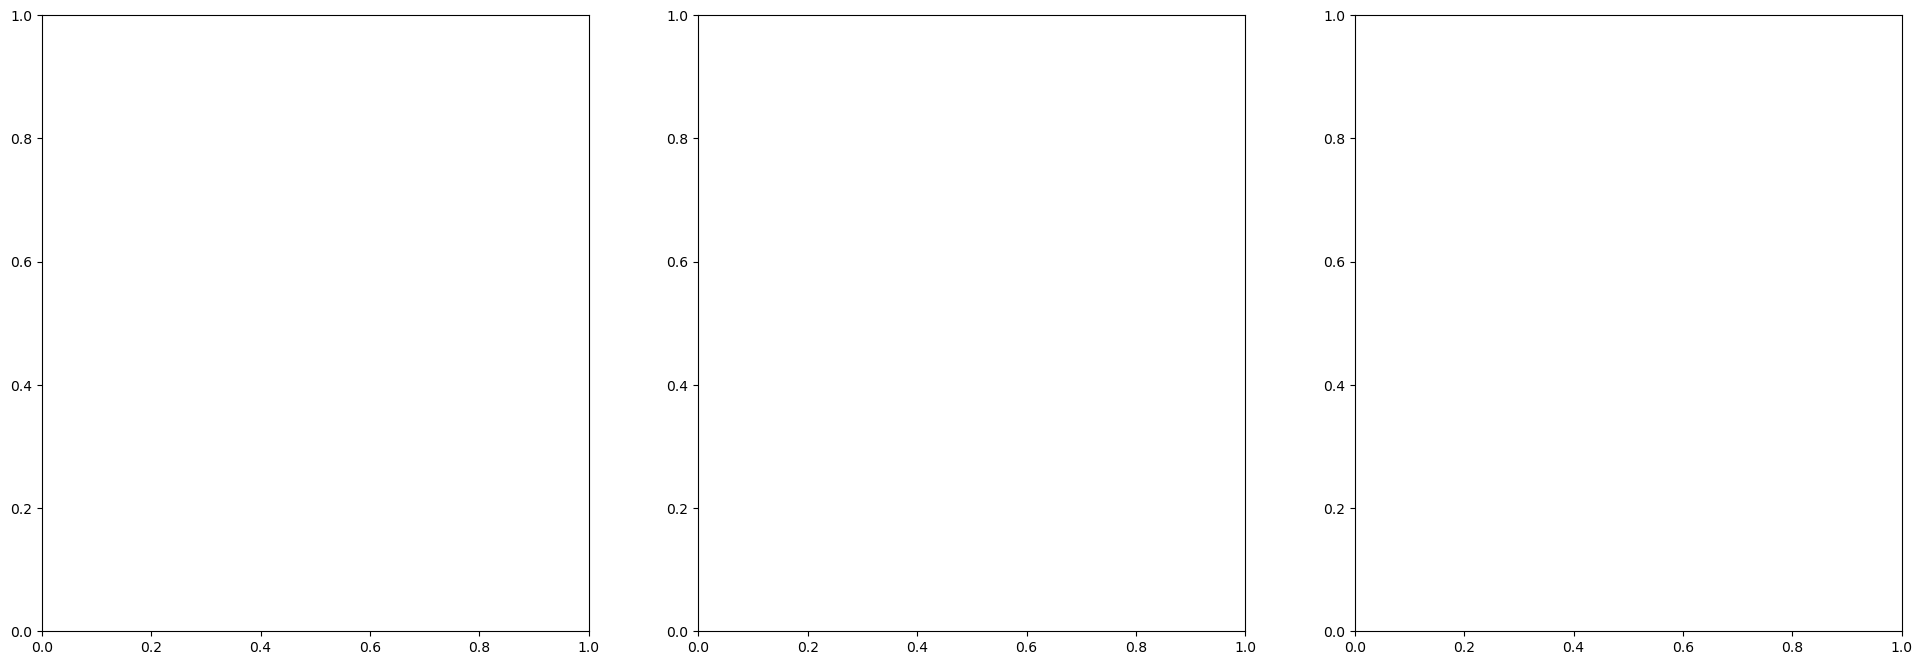

In [2]:
import matplotlib.pyplot as plt
from sklearn import metrics
import os

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Confusion Matrix for CV Fold 1
cm1 = metrics.confusion_matrix(y_train_fold_1, best_model.predict(train_fold_1))
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['DS', 'SE'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('CV Fold 1')

# Confusion Matrix for CV Fold 2
cm2 = metrics.confusion_matrix(y_train_fold_2, best_model.predict(train_fold_2))
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['DS', 'SE'])
disp2.plot(ax=axes[1], cmap='Blues')
axes[1].set_title('CV Fold 2')

# Confusion Matrix for CV Fold 3
cm3 = metrics.confusion_matrix(y_train_fold_3, best_model.predict(train_fold_3))
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['DS', 'SE'])
disp3.plot(ax=axes[2], cmap='Blues')
axes[2].set_title('CV Fold 3')

# Adjust layout
plt.tight_layout()

# Change directory to save the plots
os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/')

# Save the plots
#plt.savefig('confusion_matrix_cv_folds.jpg')
#plt.savefig('confusion_matrix_cv_folds.svg')

#plt.show()


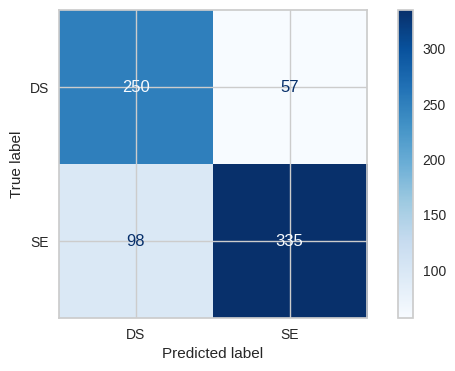

In [480]:
fig, ax = plt.subplots(figsize = (8,4))

cm = metrics.confusion_matrix(y_test,  best_model.predict(X_test_new))#, normalize = 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['DS', 'SE'])
disp.plot(ax = ax, cmap = 'Blues')

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/')
plt.savefig('confusion_matrix_test_set.jpg')
plt.savefig('confusion_matrix_test_set.svg')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))

cm = metrics.confusion_matrix(y_test,  best_model.predict(X_test_new))#, normalize = 'true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['DS', 'SE'])
disp.plot(ax = ax, cmap = 'Blues')

os.chdir('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/')
plt.savefig('confusion_matrix_test_set.jpg')
plt.savefig('confusion_matrix_test_set.svg')
plt.show()

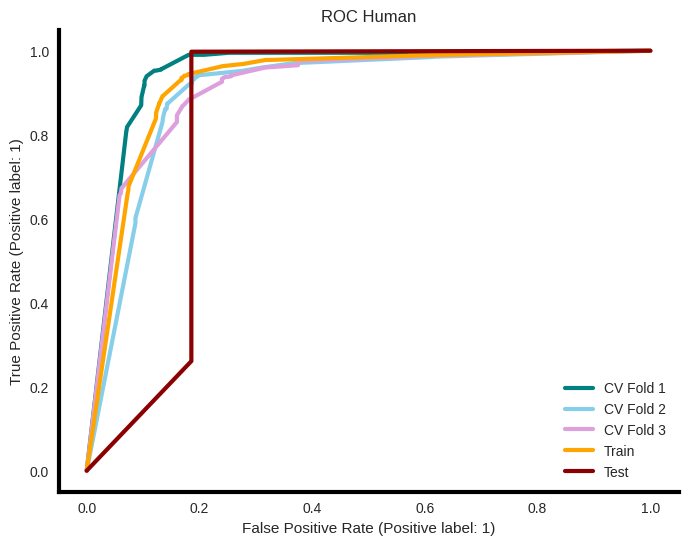

In [533]:
from yellowbrick import classifier
fig, axes = plt.subplots(figsize = (8, 6), ncols = 1)

metrics.RocCurveDisplay.from_estimator(best_model, train_fold_1, y_train_fold_1, ax = axes, label = 'CV Fold 1', color = 'teal', linewidth=3)
metrics.RocCurveDisplay.from_estimator(best_model, train_fold_2, y_train_fold_2, ax = axes, label = 'CV Fold 2', color = 'skyblue', linewidth=3)
metrics.RocCurveDisplay.from_estimator(best_model, train_fold_3, y_train_fold_3, ax = axes, label = 'CV Fold 3', color = 'plum', linewidth=3)
metrics.RocCurveDisplay.from_estimator(best_model, X_train_new, y_train, ax = axes, label = 'Train', color = 'orange', linewidth=3)
metrics.RocCurveDisplay.from_estimator(best_model, X_test_new, y_test, ax = axes, label = 'Test', color='darkred', linewidth=3)
axes.set(title = 'ROC Human')
axes.grid(False)

# Remove the top and right spines
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# Make bottom (X-axis) and left (Y-axis) spines thicker
axes.spines['bottom'].set_linewidth(3)
axes.spines['left'].set_linewidth(3)
axes.spines['bottom'].set_edgecolor('black')
axes.spines['left'].set_edgecolor('black')

# Remove the background grid
axes.grid(False)
# Save the plot as a PNG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/roc_plot.png', format='png')

# Save the plot as an SVG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/roc_plot.svg', format='svg')
plt.show()

In [492]:
import shap 
shap.initjs()
shap_ex = shap.TreeExplainer(best_model)
train_vals = shap_ex(X_train_new)
test_vals = shap_ex(X_test_new)

In [493]:
shap_df = pd.DataFrame(vals.values, columns = X_train_new.columns)
shap_df

,cc_E2_M2,coh_theta_O1_E2,C3_RDE,plv_delta_O1_C3,cc_F3_C3,pli_sigma_O1_C3,O1_dispen,plv_beta_O1_E1,cc_E2_F3,coh_sigma_O1_E1,...,cc_E1_C3,plv_theta_O1_F3,coh_theta_O1_E1,cc_C3_O1,plv_theta_E2_E1,cc_E1_F3,cc_E1_O1,cc_F3_O1,plv_sigma_E2_E1,coh_delta_C3_F3
0,0.0,0.0,0.0,0.0,0.009663,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.009288,0.0,0.0,-0.000547,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,-0.004786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001956,0.0,0.0,0.020912,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,-0.004786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001956,0.0,0.0,0.020912,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,-0.004786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001956,0.0,0.0,0.020912,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-0.004786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001956,0.0,0.0,0.020912,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.0,0.0,0.0,-0.004786,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.001956,0.0,0.0,0.027619,0.0,0.0,0.0
736,0.0,0.0,0.0,0.0,0.004180,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004955,0.0,0.0,0.016218,0.0,0.0,0.0
737,0.0,0.0,0.0,0.0,0.004180,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004955,0.0,0.0,0.016090,0.0,0.0,0.0
738,0.0,0.0,0.0,0.0,0.008438,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008560,0.0,0.0,-0.021868,0.0,0.0,0.0


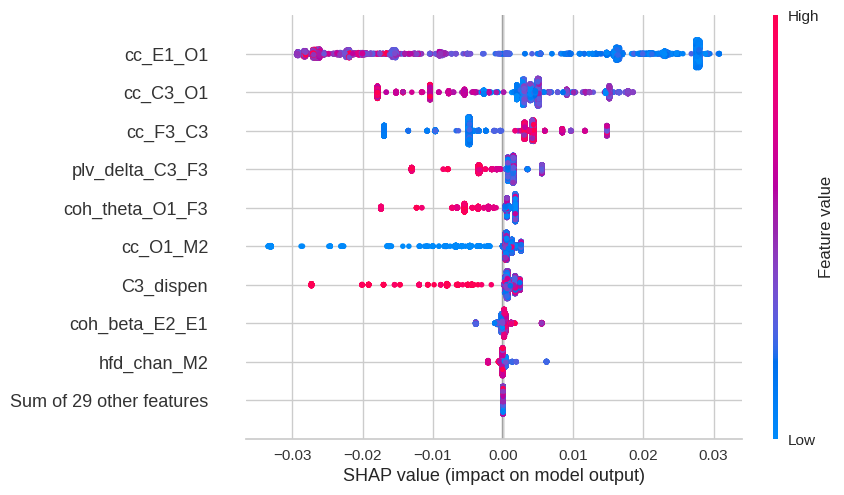

<Figure size 800x550 with 0 Axes>

In [510]:
fig = plt.figure(figsize = (8, 4))
shap.plots.beeswarm(train_vals, max_display = len(X_train_new.columns[0:10]))


# Save the figure as a PNG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/shap_beeswarm_plot_train.png', format='png')

# Save the figure as an SVG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/shap_beeswarm_plot_train.svg', format='svg')

plt.show()  # Display the plot

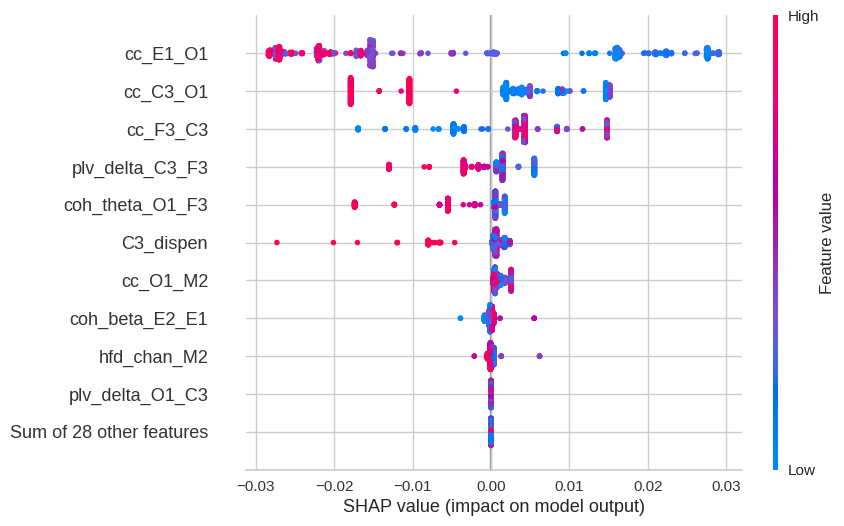

<Figure size 800x550 with 0 Axes>

In [511]:
# Create a figure with specified size
fig = plt.figure(figsize=(8, 4))

# Generate the SHAP beeswarm plot
shap.plots.beeswarm(test_vals, max_display=len(X_test_new.columns[0:11]))


# Save the figure as a PNG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/shap_beeswarm_plot_test.png', format='png')

# Save the figure as an SVG file
plt.savefig('/home/melissa/RESULTS/FINAL_MODEL/Human/Model_Evaluation_Plots/shap_beeswarm_plot_test.svg', format='svg')

plt.show()  # Display the plot

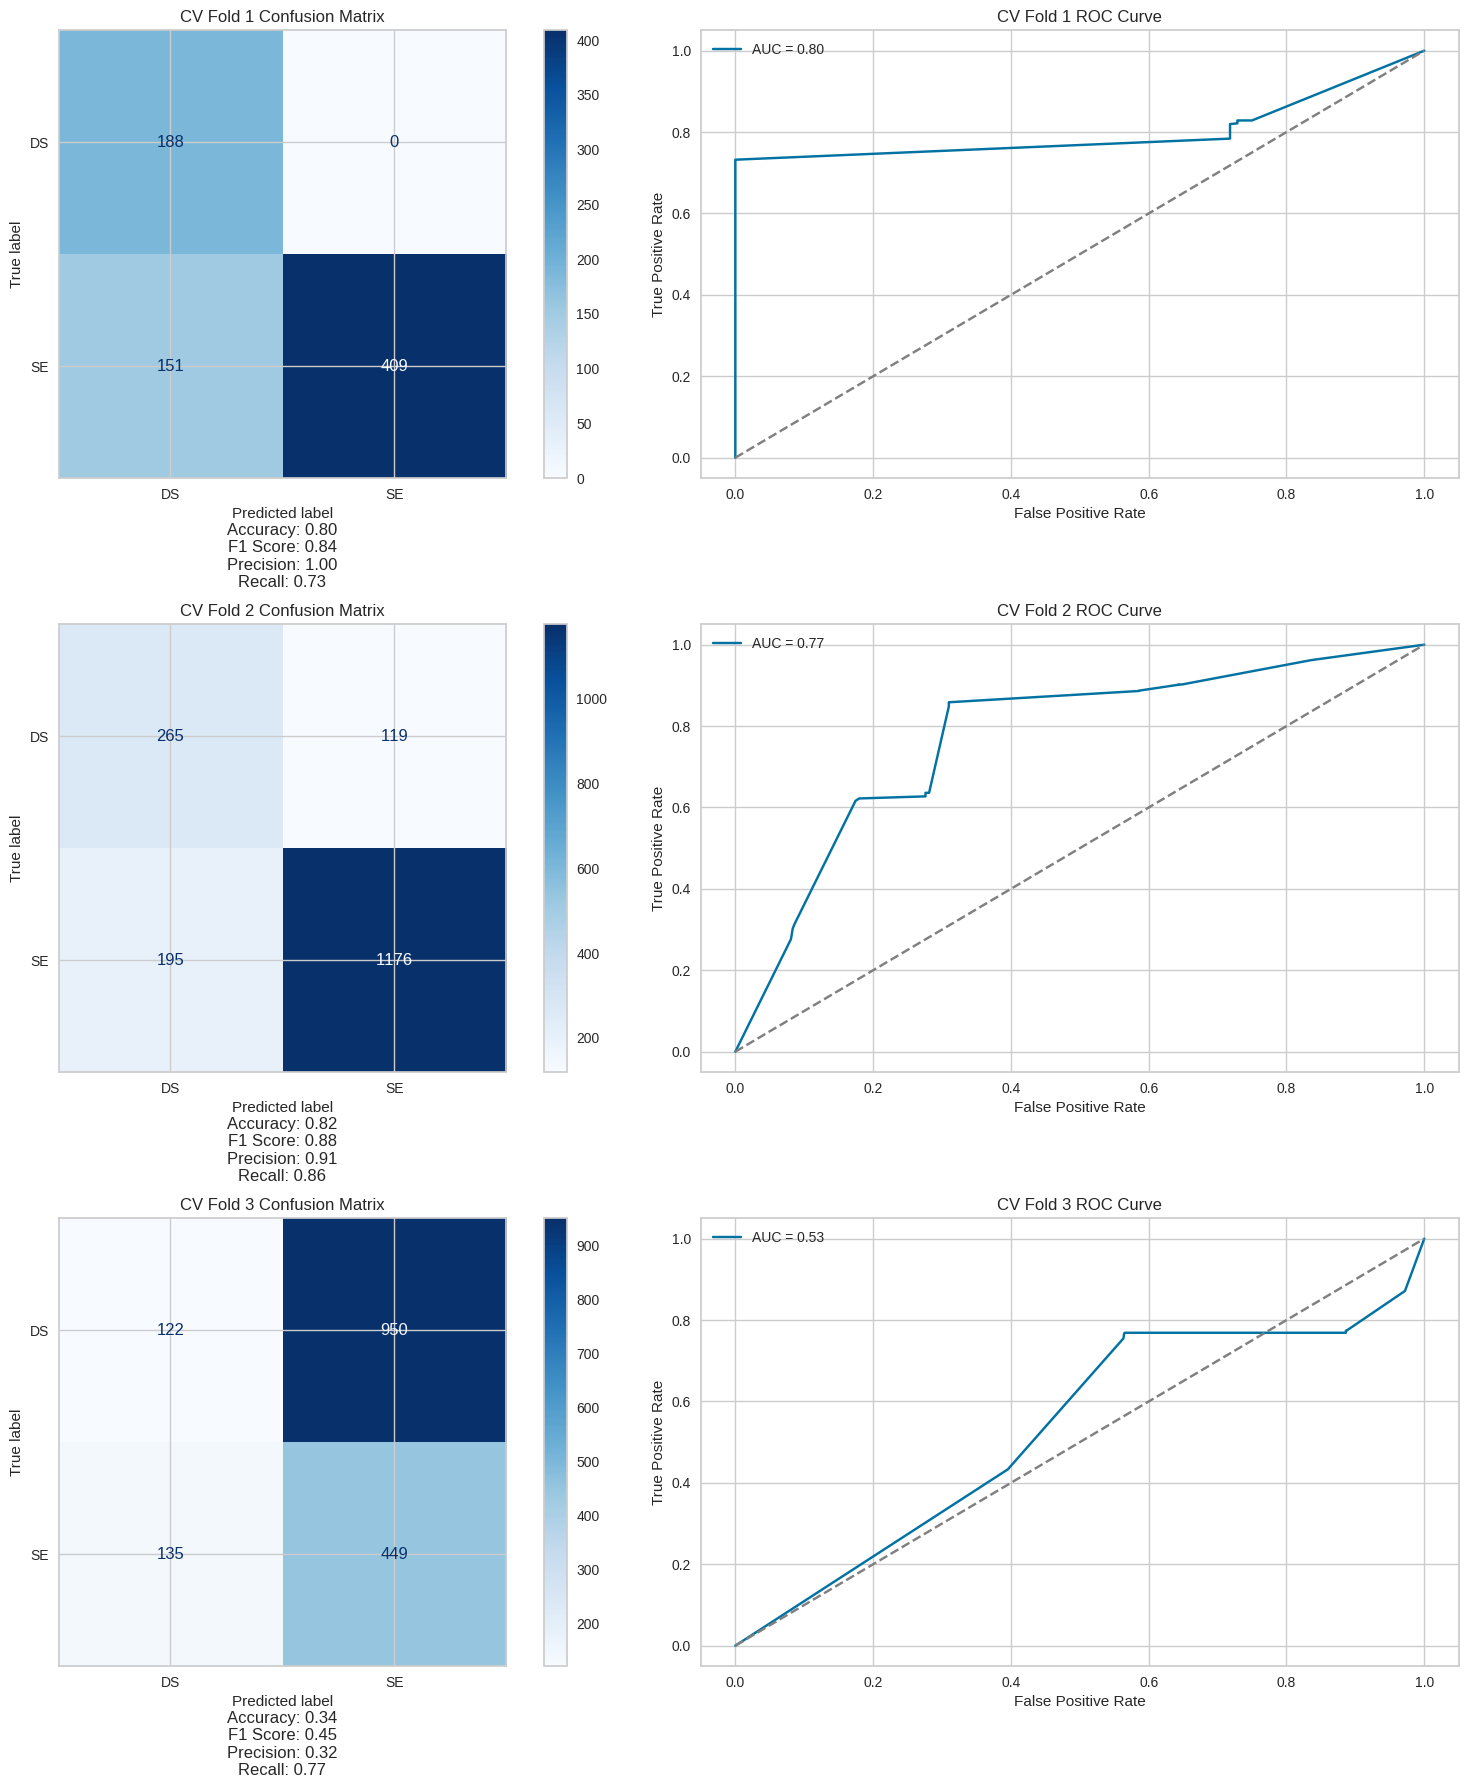

In [298]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve,
                             roc_auc_score, accuracy_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import StratifiedGroupKFold

best_model = XGBClassifier(**best, random_state = 42)
resample = SMOTEENN()
pipeline = Pipeline(steps=[('r', resample), ('m', best_model)])

# Create a figure with 3 rows and 2 columns (for 3 folds)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

cv = StratifiedGroupKFold(n_splits=3, random_state= 3, shuffle=True)
fold = 0

for train_idx, test_idx in cv.split(X_train_SMOTE, y_train_SMOTE, groups=groups_by_patient_id_list):
    # Splitting the data
    X_train_fold, X_test_fold = X_train_SMOTE.iloc[train_idx], X_train_SMOTE.iloc[test_idx]
    y_train_fold, y_test_fold = y_train_SMOTE.iloc[train_idx], y_train_SMOTE.iloc[test_idx]

    # Fit the model
    pipeline.fit(X_train_fold, y_train_fold)

    # Make predictions and get probabilities for the ROC curve
    y_pred_fold = pipeline.predict(X_test_fold)
    y_prob_fold = pipeline.predict_proba(X_test_fold)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    f1 = f1_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold)
    recall = recall_score(y_test_fold, y_pred_fold)
    auc = roc_auc_score(y_test_fold, y_prob_fold)

    # Confusion Matrix for current fold
    cm_fold = confusion_matrix(y_test_fold, y_pred_fold)
    disp_fold = ConfusionMatrixDisplay(confusion_matrix=cm_fold, display_labels=['DS', 'SE'])
    disp_fold.plot(ax=axes[fold, 0], cmap='Blues')
    axes[fold, 0].set_title(f'CV Fold {fold + 1} Confusion Matrix')

    # ROC Curve for current fold
    fpr, tpr, thresholds = roc_curve(y_test_fold, y_prob_fold)
    axes[fold, 1].plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    axes[fold, 1].plot([0, 1], [0, 1], color='grey', linestyle='--')
    axes[fold, 1].set_xlabel('False Positive Rate')
    axes[fold, 1].set_ylabel('True Positive Rate')
    axes[fold, 1].set_title(f'CV Fold {fold + 1} ROC Curve')
    axes[fold, 1].legend(loc='best')

    # Annotate with metrics
    metrics_text = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}'
    axes[fold, 0].text(0.5, -0.1, metrics_text, ha='center', va='top', transform=axes[fold, 0].transAxes)

    fold += 1

plt.tight_layout()
plt.show()
